In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from mislabelling import pair_noise, NNAR
from testing import *
from AdjustedRandomForest import train

In [4]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 10
TEST_SIZE = 0.25
ITERATIONS = 20

FIG_SIZE = (5,4)
FONT_SIZE = 10
plt.rcParams["figure.figsize"] = FIG_SIZE  # width, height in inches

data = load_wine()

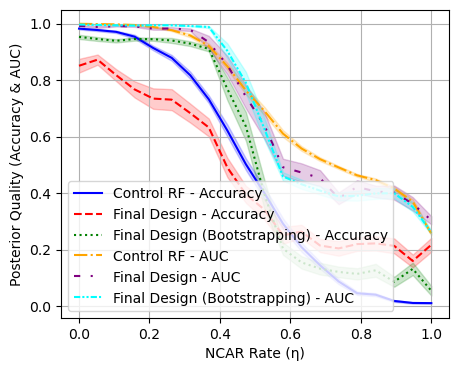

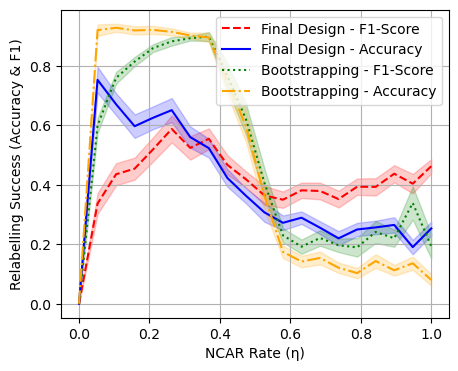

In [5]:
accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, pair_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, pair_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF - Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design - Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping) - Accuracy", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))


plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Posterior Quality (Accuracy & AUC)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
values, counts = np.unique(data.target, return_counts=True)
print({int(k): int(v) for k, v in zip(values, counts)})
total_vals = sum(counts)

noise_ratio = [1 - count/total_vals for count in counts]
noise_ratio /= min(noise_ratio)
print([float(f"{val:.3g}") for val in noise_ratio])

{0: 59, 1: 71, 2: 48}
[1.11, 1.0, 1.21]


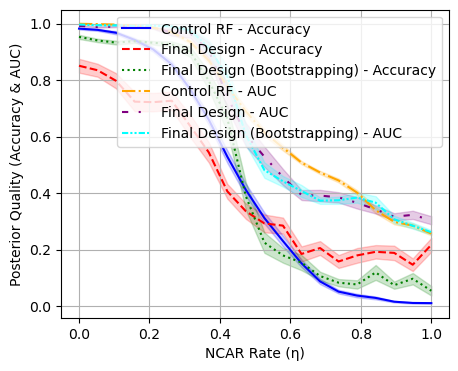

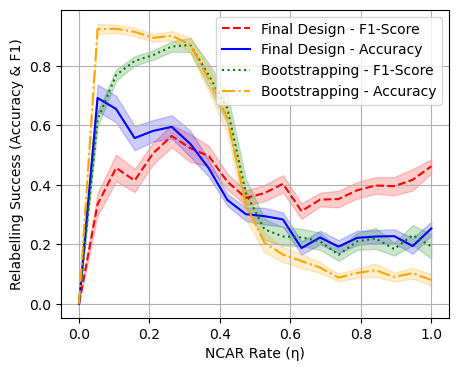

In [7]:
accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, pair_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    noise_ratio= noise_ratio
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, pair_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True,
    noise_ratio= noise_ratio
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF - Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design - Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping) - Accuracy", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Posterior Quality (Accuracy & AUC)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

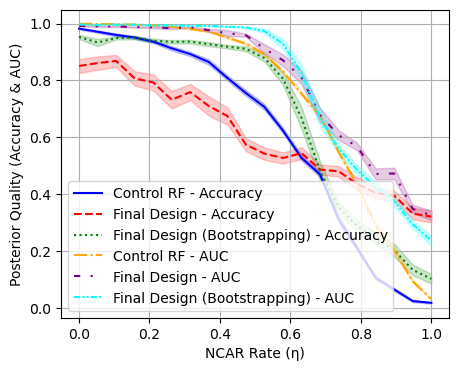

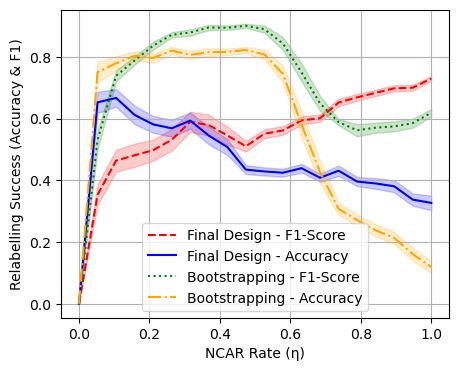

In [8]:
clf = RandomForestClassifier(random_state=42)
clf.fit(data.data, data.target)

accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, NNAR,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    clf = clf
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, NNAR,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True, 
    clf = clf
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)


# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF - Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design - Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Final Design (Bootstrapping) - Accuracy", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF - AUC", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design - AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Final Design (Bootstrapping) - AUC", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))


plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Posterior Quality (Accuracy & AUC)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

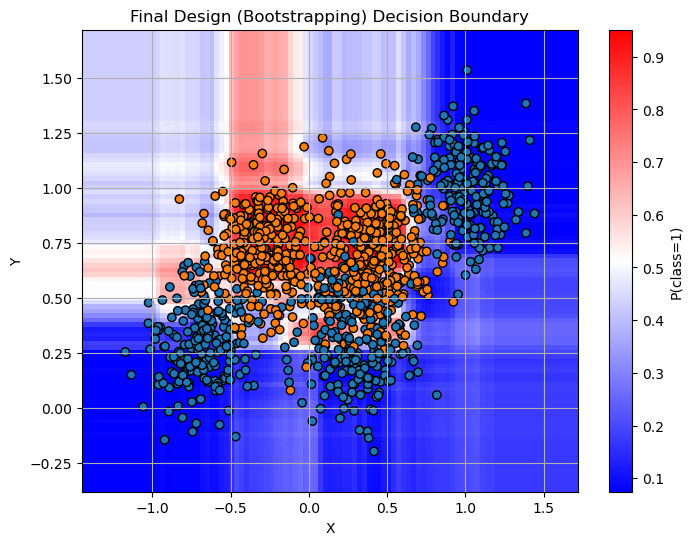

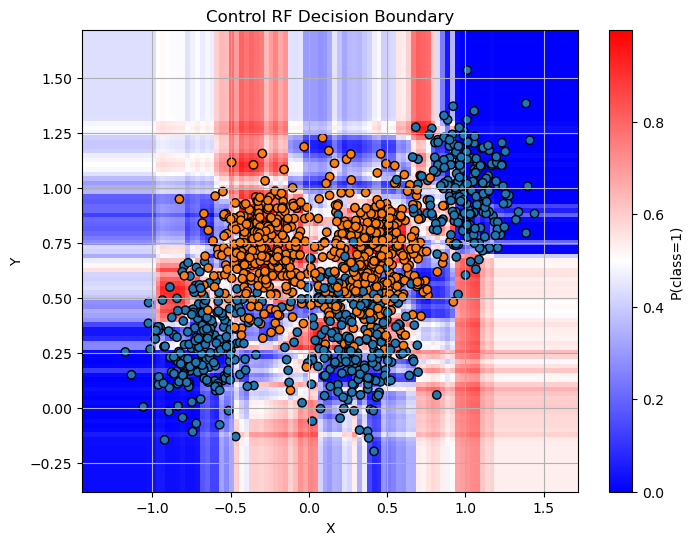

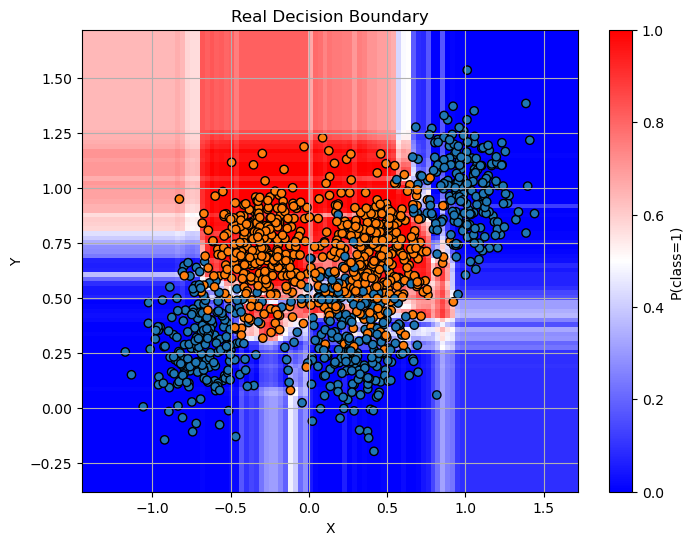

In [9]:
data = load_gmm5()
clf.fit(data.data, data.target)

SEED = 42
RESOLUTION = 100

X = data.data
y = data.target

x_min, x_max = X[:, 0].min() - 0.1 * abs(np.ptp(X[:, 0])), X[:, 0].max() + 0.1 * abs(np.ptp(X[:, 0]))
y_min, y_max = X[:, 1].min() - 0.1 * abs(np.ptp(X[:, 1])), X[:, 1].max() + 0.1 * abs(np.ptp(X[:, 1]))

# Create a grid of points
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, RESOLUTION + 1),
    np.linspace(y_min, y_max, RESOLUTION + 1)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Get predicted probabilities for each point in the grid
y_mislabelled = NNAR(data.data, data.target, clf, 0.45, seed=SEED)
probs_all = np.zeros(xx.shape)
probs_ctrl_all = np.zeros(xx.shape)

for trial in range(35):
    rf, _ = train(RandomForestClassifier, data.data, y_mislabelled, 10, 10, bootstrapping=True) 
    ctrl = RandomForestClassifier(random_state= SEED + trial)
    ctrl.fit(data.data, y_mislabelled)
    
    probs = rf.predict_proba(grid)[:, 1]
    probs_all += probs.reshape(xx.shape)
    probs = ctrl.predict_proba(grid)[:, 1]
    probs_ctrl_all += probs.reshape(xx.shape)

probs_all /= TRIALS
probs_ctrl_all /= TRIALS
probs_real = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(xx, yy, probs_all, cmap='bwr', shading='auto')
cbar = plt.colorbar(contour, label=f'P(class={1})')
cbar.set_label(f'P(class={1})', fontsize=FONT_SIZE)

# Overlay the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
plt.title("Final Design (Bootstrapping) Decision Boundary")
plt.xlabel(fontsize=FONT_SIZE, xlabel = "X")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Y")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(xx, yy, probs_ctrl_all, cmap='bwr', shading='auto')
cbar = plt.colorbar(contour, label=f'P(class={1})')
cbar.set_label(f'P(class={1})', fontsize=FONT_SIZE)


# Overlay the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
plt.title("Control RF Decision Boundary")
plt.xlabel(fontsize=FONT_SIZE, xlabel = "X")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Y")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(xx, yy, probs_real, cmap='bwr', shading='auto')
cbar = plt.colorbar(contour, label=f'P(class={1})')
cbar.set_label(f'P(class={1})', fontsize=FONT_SIZE)

# Overlay the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
plt.title("Real Decision Boundary")
plt.xlabel(fontsize=FONT_SIZE, xlabel = "X")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Y")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)
plt.show()

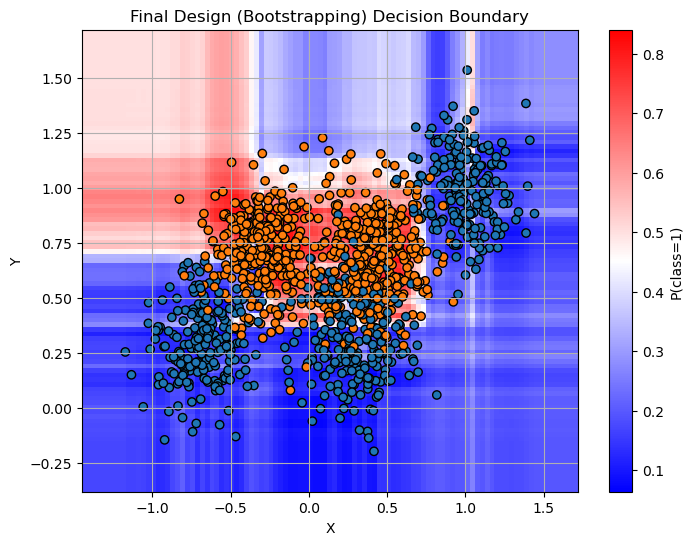

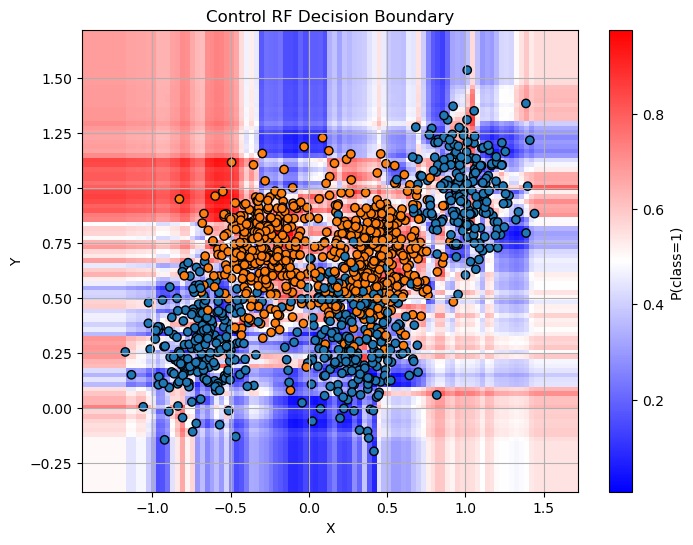

In [10]:
data = load_gmm5()

X = data.data
y = data.target

x_min, x_max = X[:, 0].min() - 0.1 * abs(np.ptp(X[:, 0])), X[:, 0].max() + 0.1 * abs(np.ptp(X[:, 0]))
y_min, y_max = X[:, 1].min() - 0.1 * abs(np.ptp(X[:, 1])), X[:, 1].max() + 0.1 * abs(np.ptp(X[:, 1]))

# Create a grid of points
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, RESOLUTION + 1),
    np.linspace(y_min, y_max, RESOLUTION + 1)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Get predicted probabilities for each point in the grid
y_mislabelled = pair_noise(np.copy(data.target), 0.4, len(set(data.target)), seed=SEED)
probs_all = np.zeros(xx.shape)
probs_ctrl_all = np.zeros(xx.shape)

for trial in range(35):
    rf, _ = train(RandomForestClassifier, data.data, y_mislabelled, 10, 10, bootstrapping=True) 
    ctrl = RandomForestClassifier(random_state= SEED + trial)
    ctrl.fit(data.data, y_mislabelled)
    
    probs = rf.predict_proba(grid)[:, 1]
    probs_all += probs.reshape(xx.shape)
    probs = ctrl.predict_proba(grid)[:, 1]
    probs_ctrl_all += probs.reshape(xx.shape)

probs_all /= TRIALS
probs_ctrl_all /= TRIALS
probs_real = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(xx, yy, probs_all, cmap='bwr', shading='auto')
cbar = plt.colorbar(contour, label=f'P(class={1})')
cbar.set_label(f'P(class={1})', fontsize=FONT_SIZE)

# Overlay the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
plt.title("Final Design (Bootstrapping) Decision Boundary")
plt.xlabel(fontsize=FONT_SIZE, xlabel = "X")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Y")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(xx, yy, probs_ctrl_all, cmap='bwr', shading='auto')
cbar = plt.colorbar(contour, label=f'P(class={1})')
cbar.set_label(f'P(class={1})', fontsize=FONT_SIZE)

# Overlay the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#1f77b4', '#ff7f0e']))
plt.title("Control RF Decision Boundary")
plt.xlabel(fontsize=FONT_SIZE, xlabel = "X")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Y")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(True)
plt.show()